In [1]:
import numpy as np
import pandas as pd


%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import mpld3 as mpl
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
#from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.svm import LinearSVC
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import (ClusterCentroids, RandomUnderSampler,
                                     NearMiss,
                                     InstanceHardnessThreshold,
                                     CondensedNearestNeighbour,
                                     EditedNearestNeighbours,
                                     RepeatedEditedNearestNeighbours,
                                     AllKNN,
                                     NeighbourhoodCleaningRule,
                                     OneSidedSelection)

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

#Seleção de prototipos
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler



In [2]:
#data = pd.read_csv("data/breast-cancer-wisconsin.csv")
data = pd.read_csv("data/data.csv")
data

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M       17.990         10.38          122.80     1001.0   
1      842517         M       20.570         17.77          132.90     1326.0   
2    84300903         M       19.690         21.25          130.00     1203.0   
3    84348301         M       11.420         20.38           77.58      386.1   
4    84358402         M       20.290         14.34          135.10     1297.0   
5      843786         M       12.450         15.70           82.57      477.1   
6      844359         M       18.250         19.98          119.60     1040.0   
7    84458202         M       13.710         20.83           90.20      577.9   
8      844981         M       13.000         21.82           87.50      519.8   
9    84501001         M       12.460         24.04           83.97      475.9   
10     845636         M       16.020         23.24          102.70      797.8   
11   84610002         M       15.780         17.89          103.60      781.0   
12     846226         M       19.170         24.80          132.40     1123.0   
13     846381         M       15.850         23.95          103.70      782.7   
14   84667401         M       13.730         22.61           93.60      578.3   
15   84799002         M       14.540         27.54           96.73      658.8   
16     848406         M       14.680         20.13           94.74      684.5   
17   84862001         M       16.130         20.68          108.10      798.8   
18     849014         M       19.810         22.15          130.00     1260.0   
19    8510426         B       13.540         14.36           87.46      566.3   
20    8510653         B       13.080         15.71           85.63      520.0   
21    8510824         B        9.504         12.44           60.34      273.9   
22    8511133         M       15.340         14.26          102.50      704.4   
23     851509         M       21.160         23.04          137.20     1404.0   
24     852552         M       16.650         21.38          110.00      904.6   
25     852631         M       17.140         16.40          116.00      912.7   
26     852763         M       14.580         21.53           97.41      644.8   
27     852781         M       18.610         20.25          122.10     1094.0   
28     852973         M       15.300         25.27          102.40      732.4   
29     853201         M       17.570         15.05          115.00      955.1   
..        ...       ...          ...           ...             ...        ...   
539    921362         B        7.691         25.44           48.34      170.4   
540    921385         B       11.540         14.44           74.65      402.9   
541    921386         B       14.470         24.99           95.81      656.4   
542    921644         B       14.740         25.42           94.70      668.6   
543    922296         B       13.210         28.06           84.88      538.4   
544    922297         B       13.870         20.70           89.77      584.8   
545    922576         B       13.620         23.23           87.19      573.2   
546    922577         B       10.320         16.35           65.31      324.9   
547    922840         B       10.260         16.58           65.85      320.8   
548    923169         B        9.683         19.34           61.05      285.7   
549    923465         B       10.820         24.21           68.89      361.6   
550    923748         B       10.860         21.48           68.51      360.5   
551    923780         B       11.130         22.44           71.49      378.4   
552    924084         B       12.770         29.43           81.35      507.9   
553    924342         B        9.333         21.94           59.01      264.0   
554    924632         B       12.880         28.92           82.50      514.3   
555    924934         B       10.290         27.61           65.67      321.4   
556    924964         B       10.160      

In [3]:
data.drop('id', axis=1, inplace=True)
data.drop('Unnamed: 32',axis=1,inplace=True)
len(data)

569

In [4]:
print(data.columns)

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [5]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [6]:
data['diagnosis'] = data['diagnosis'].map({'M':1, 'B':0})
data.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [7]:
data.describe()

diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

In [14]:
diagnosis = data['diagnosis'].value_counts()

diagnosis_label = diagnosis.index
diagnosis_size = diagnosis.values

colors = ['pink', 'lightgreen']

trace = go.Pie(labels = diagnosis_label,
              values = diagnosis_size,
               marker = dict(colors = colors),
               name = 'Breast Cancer',
               hole = 0.3
              )
df = [trace]
layout = go.Layout(title = 'Distribution of Patients')

fig = go.Figure(data = df, layout = layout)
py.iplot(fig)

In [15]:
features_mean = list(data.columns[1:11])
features_se = list(data.columns[11:21])
features_worst = list(data.columns[21:31])
dataM = data[data['diagnosis'] == 1]
dataB = data[data['diagnosis'] == 0]

/usr/local/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.



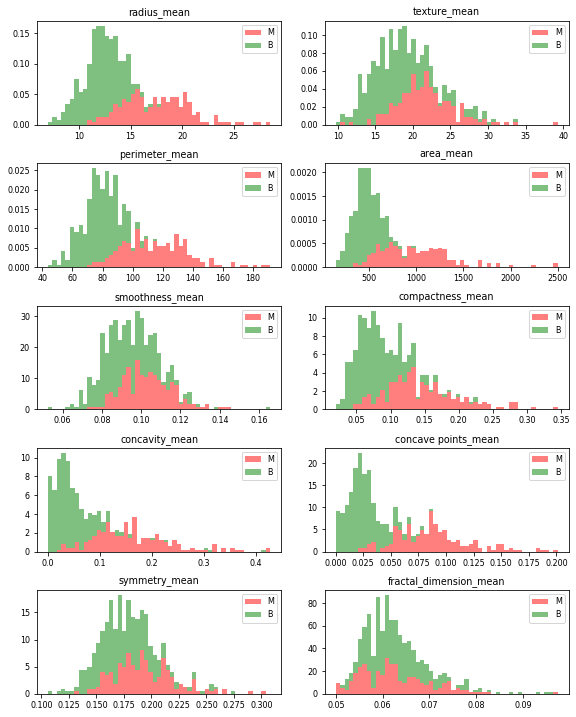

In [16]:
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(data[features_mean[idx]]) - min(data[features_mean[idx]]))/50
    ax.hist([dataM[features_mean[idx]],dataB[features_mean[idx]]], bins=np.arange(min(data[features_mean[idx]]), max(data[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, normed = True, label=['M','B'],color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

/usr/local/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.



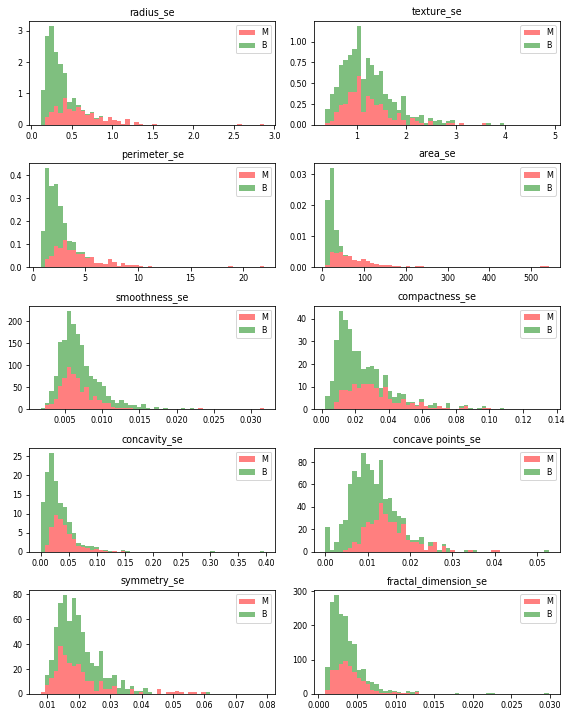

In [17]:
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(data[features_se[idx]]) - min(data[features_se[idx]]))/50
    ax.hist([dataM[features_se[idx]],dataB[features_se[idx]]], bins=np.arange(min(data[features_se[idx]]), max(data[features_se[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, normed = True, label=['M','B'],color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_se[idx])
plt.tight_layout()
plt.show()

/usr/local/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.



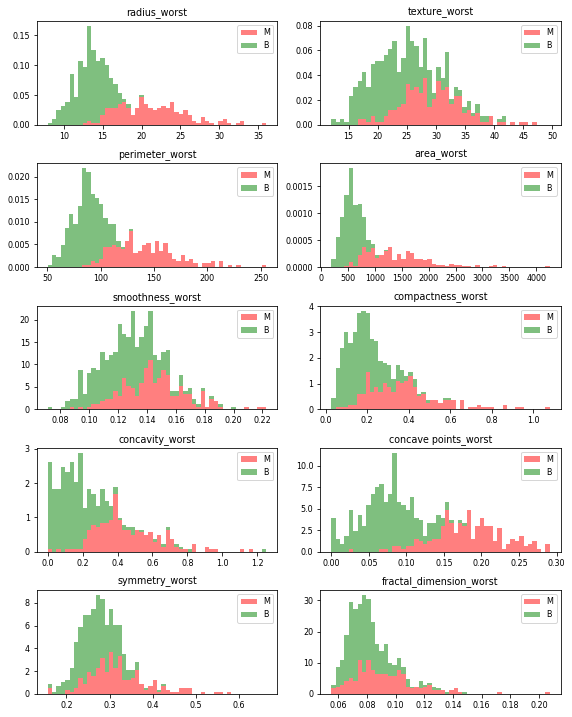

In [18]:
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(data[features_worst[idx]]) - min(data[features_worst[idx]]))/50
    ax.hist([dataM[features_worst[idx]],dataB[features_worst[idx]]], bins=np.arange(min(data[features_worst[idx]]), max(data[features_worst[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, normed = True, label=['M','B'],color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_worst[idx])
plt.tight_layout()
plt.show()

In [19]:
def plot_distribution(data_select, size_bin) :  
    tmp1 = dataM[data_select]
    tmp2 = dataB[data_select]
    hist_data = [tmp1, tmp2]
    
    group_labels = ['maligno', 'benigno']
    colors = ['#FFD700', '#7EC0EE']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = size_bin, curve_type='kde')
    
    fig['layout'].update(title = data_select)

    py.iplot(fig, filename = 'Density plot')

In [20]:
#plot distribution 'mean'
plot_distribution('radius_mean', .5)
plot_distribution('texture_mean', .5)
plot_distribution('perimeter_mean', 5)
plot_distribution('area_mean', 10)
plot_distribution('smoothness_mean', .5)
plot_distribution('compactness_mean', .5)
plot_distribution('concavity_mean', .5)
plot_distribution('concave points_mean', .5)
plot_distribution('symmetry_mean', .5)
plot_distribution('fractal_dimension_mean', .5)



In [21]:
plot_distribution('radius_se', .5)
plot_distribution('texture_se', .5)
plot_distribution('perimeter_se', 5)
plot_distribution('area_se', 10)
plot_distribution('smoothness_se', .5)
plot_distribution('compactness_se', .5)
plot_distribution('concavity_se', .5)
plot_distribution('concave points_se', .5)
plot_distribution('symmetry_se', .5)
plot_distribution('fractal_dimension_se', .5)

In [22]:
plot_distribution('radius_worst', .5)
plot_distribution('texture_worst', .5)
plot_distribution('perimeter_worst', 5)
plot_distribution('area_worst', 10)
plot_distribution('smoothness_worst', .5)
plot_distribution('compactness_worst', .5)
plot_distribution('concavity_worst', .5)
plot_distribution('concave points_worst', .5)
plot_distribution('symmetry_worst', .5)
plot_distribution('fractal_dimension_worst', .5)

In [23]:
#Padronização de dados
y = data.diagnosis
stdX = (data - data.mean()) / (data.std())              
data_st = pd.concat([y,stdX.iloc[:,:]])
data_st = pd.melt(data_st,id_vars="diagnosis",
                    var_name="data",
                    value_name='value')

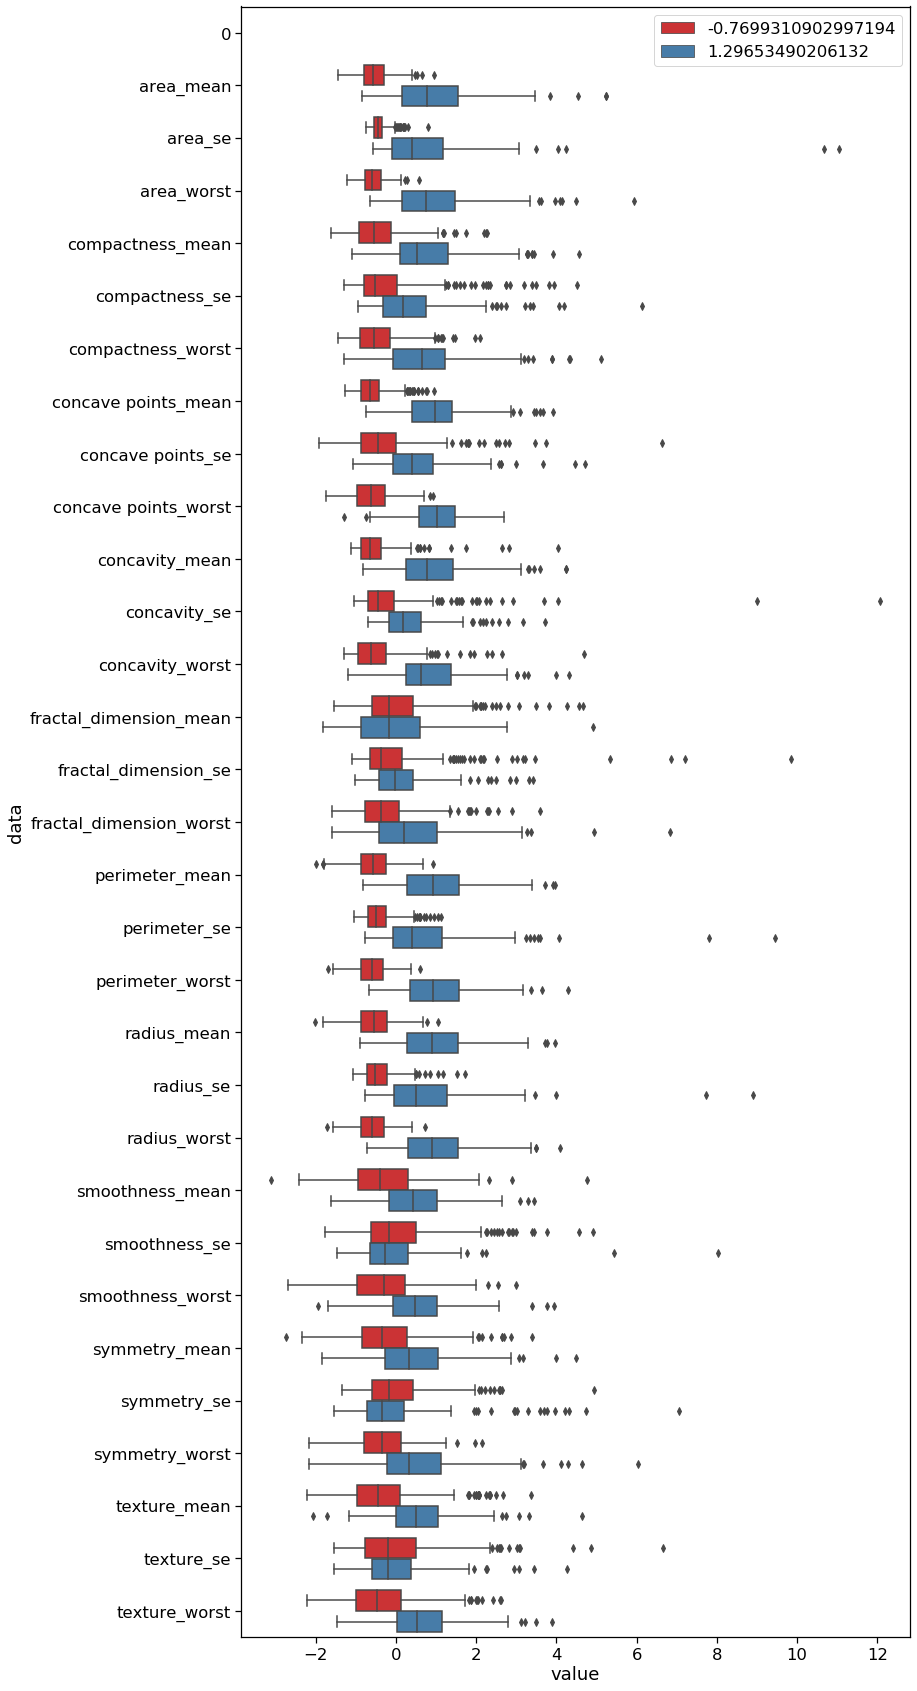

In [24]:
plt.figure(figsize=(12,30))
sns.set_context('notebook', font_scale=1.5)
sns.boxplot(x="value", y="data", hue="diagnosis", data=data_st, palette='Set1')
plt.legend(loc='best');

A partir desse gráfico, é possível identificar que alguns recursos são muito semelhantes, como, por exemplo, perímetro_mean e area_mean e perimeter_se e area_se. Além disso, também podemos observar que algumas características têm medidas diferentes quando o tumor é maligno ou benigno. Exemplos disso são area_mean, radius_mean e concavity_mean. Por outro lado, em características como fractal_dimension_mean e texture_se, a distribuição de tumoers malignos e benignos parece ser semelhante.

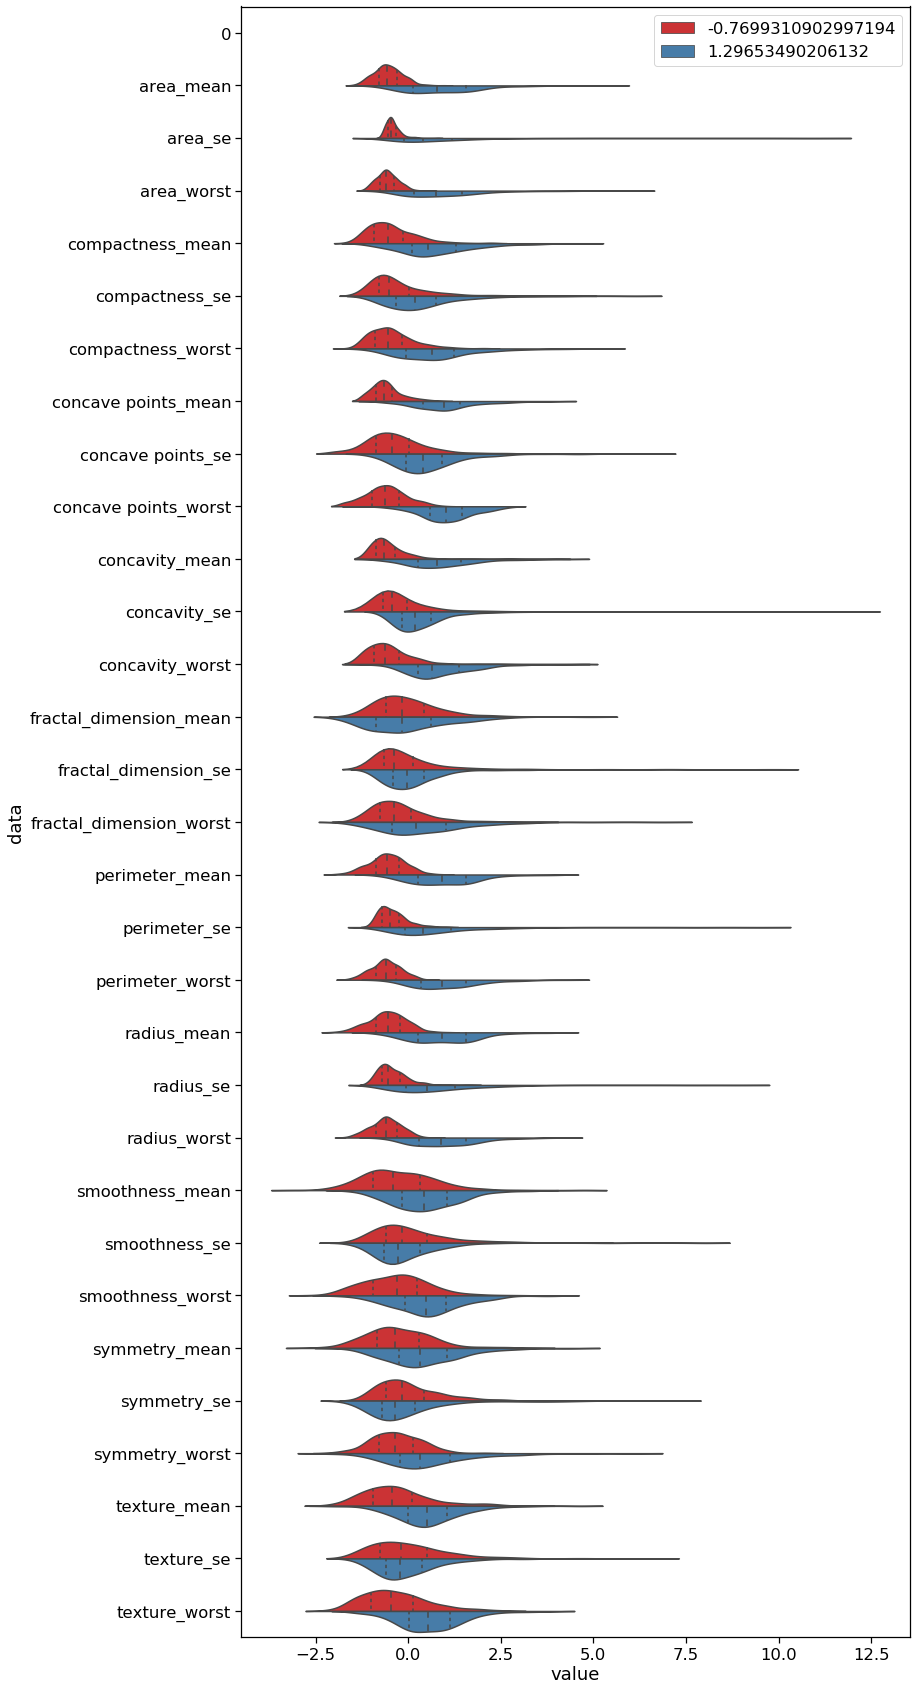

In [25]:
plt.figure(figsize=(12,30))
sns.set_context('notebook', font_scale=1.5)
sns.violinplot(x="value", y="data", hue="diagnosis", data=data_st,split=True, 
               inner="quart", palette='Set1')
plt.legend(loc='best');

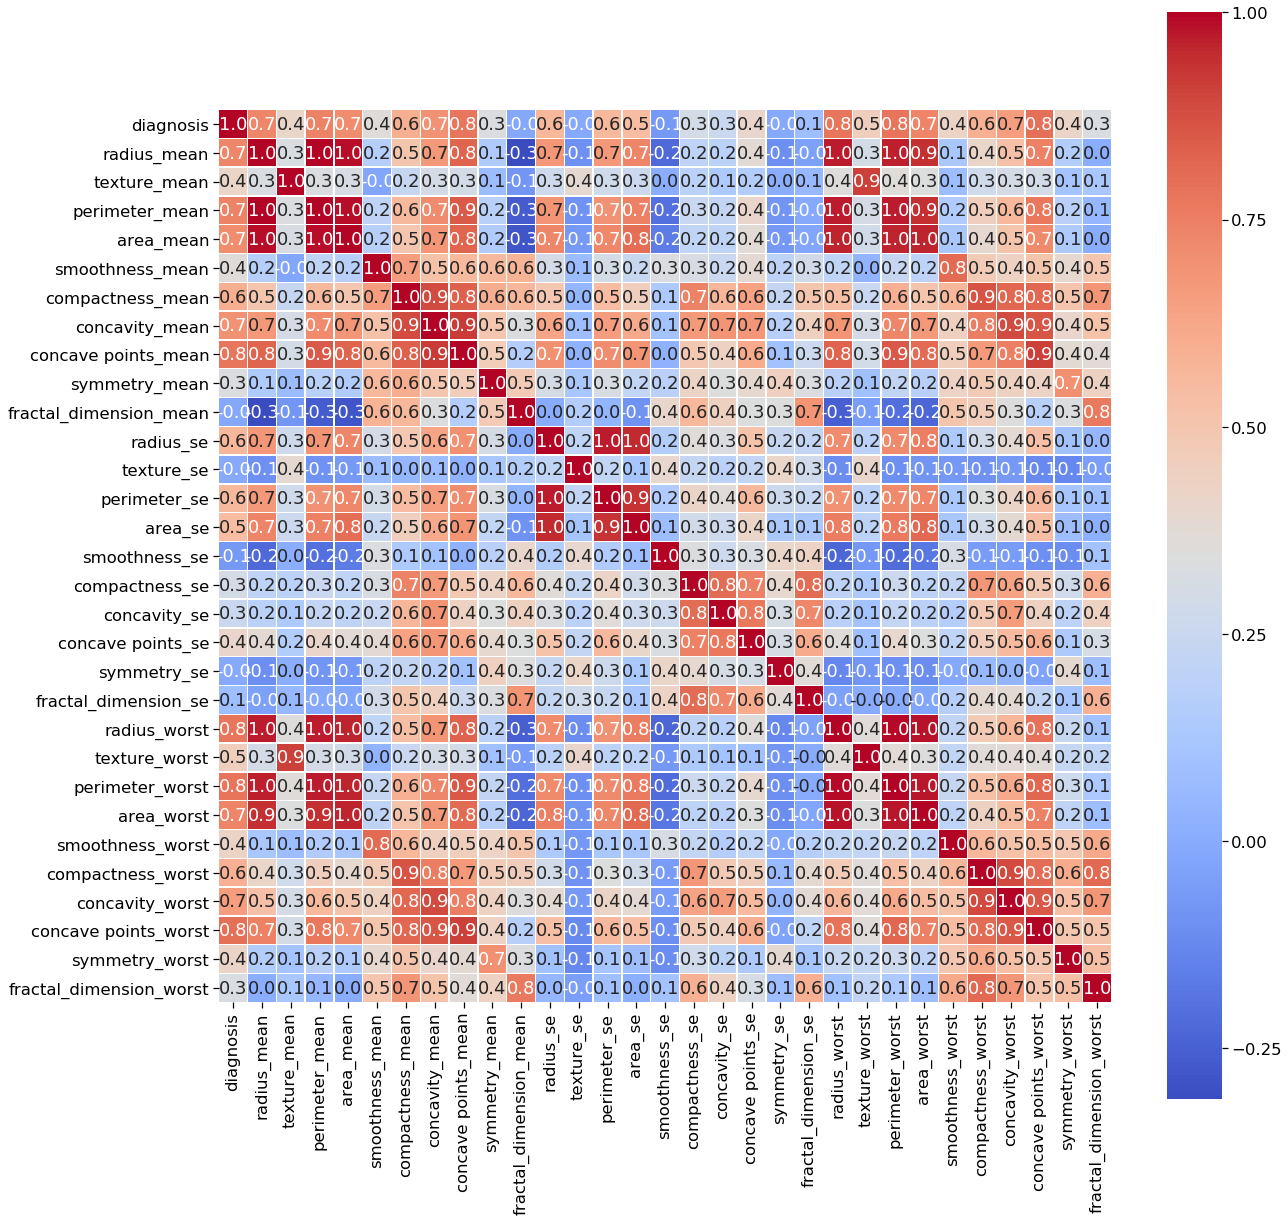

In [26]:
corr = data.corr()
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, cbar = True,  square = True, annot = True, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.5, ax=ax);

In [8]:
#dividindo a base
x = data.drop(['diagnosis'], axis=1)
y = data.diagnosis

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=27)

In [9]:
concatTrain = pd.concat([X_train, y_train], axis=1)
concatTrain.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
325        12.67         17.30           81.25      489.9          0.10280   
69         12.78         16.49           81.37      502.5          0.09831   
422        11.61         16.02           75.46      408.2          0.10880   
123        14.50         10.89           94.28      640.7          0.11010   
371        15.19         13.21           97.65      711.8          0.07963   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
325           0.07664         0.03193              0.02107         0.1707   
69            0.05234         0.03653              0.02864         0.1590   
422           0.11680         0.07097              0.04497         0.1886   
123           0.10990         0.08842              0.05778         0.1856   
371           0.06934         0.03393              0.02657         0.1721   

     fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
325                 0.05984  ...          21.10            88.70       574.4   
69                  0.05653  ...          19.76            85.67       554.9   
422                 0.06320  ...          19.67            81.93       475.7   
123                 0.06402  ...          15.98           102.80       745.5   
371                 0.05544  ...          15.73           104.50       819.1   

     smoothness_worst  compactness_worst  concavity_worst  \
325            0.1384            0.12120           0.1020   
69             0.1296            0.07061           0.1039   
422            0.1415            0.21700           0.2302   
123            0.1313            0.17880           0.2560   
371            0.1126            0.17370           0.1362   

     concave points_worst  symmetry_worst  fractal_dimension_worst  diagnosis  
325               0.05602          0.2688                  0.06888          0  
69                0.05882          0.2383                  0.06410          0  
422               0.11050          0.2787                  0.07427          0  
123               0.12210          0.2889                  0.08006          0  
371               0.08178          0.2487                  0.06766          0  

[5 rows x 31 columns]

In [111]:
# dataS = concatTrain['diagnosis']
# # dataS.head()sdfs
# # dataS = concatTrain[concatTrain.diagnosis==1]
# # dataS = dataS['diagnosis']
# dataS.head() 450.38

In [118]:
# noShowMar_clean = concatTreinoMar_clean[concatTreinoMar_clean.StatusReserva==1]#61748
# checkedoutMar_clean = concatTreinoMar_clean[concatTreinoMar_clean.StatusReserva==0]#219


In [10]:
from collections import Counter

Segundo I. Mani, I. Zhang, NearMiss adiciona algumas hurísticas para selecionar amostras. onde são implementados 3 diferentes tipos de heurísticas que podem ser selecionadas através do parâmetro version.

A NearMiss é baseada no algoritmo de knn. Portando os parametros n_neighbors e n_neighbors_ver3 aceitam classificadores derivados do KNeighborsMixin. Onde o primeiro parâmetro é usado para calcular a distância média dos vizinhos e o ultimo é usado para a pré-seleção das amostas 

In [14]:
rus = NearMiss(version=2)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))

[(0, 155), (1, 155)]


### Sobre a formulação matemática

Sejam amostras positivas pertencentes à classe alvo e serem sub-amostras. Amostra negativa refere-se às amostras da classe minoritária ou seja , a classe mais sub-representada. 

#### Explicando um pouco sobre cada parâmetro

 - O NearMiss-1 seleciona as amostras positivas para as quais a distância média até as N amostras mais próximas da classe negativa é a menor
 
 - O NearMiss-2 seleciona as amostras positivas para as quais a distância média até as N amostras mais distantes da classe negativa é a menor.
 
 - O NearMiss-3 é um algoritmo de 2 etapas. Primeiro, para cada amostra negativa, seus M vizinhos mais próximos serão mantidos. em seguda , as amostras positivas selecionadas são aquelas cuja distância média aos N vizinhos mais próximos é a maior.
 

In [22]:
# def plot_decision_function(X, y, clf, ax):
#     plot_step = 0.02
#     x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#     y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
#                          np.arange(y_min, y_max, plot_step))

#     Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
#     Z = Z.reshape(xx.shape)
#     ax.contourf(xx, yy, Z, alpha=0.4)
#     ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor='k')

In [23]:
# def plot_resampling(X, y, sampling, ax):
#     X_res, y_res = sampling.fit_resample(X, y)
#     ax.scatter(X_res[:, 0], X_res[:, 1], c=y_res, alpha=0.8, edgecolor='k')
#     # make nice plotting
#     ax.spines['top'].set_visible(False)
#     ax.spines['right'].set_visible(False)
#     ax.get_xaxis().tick_bottom()
#     ax.get_yaxis().tick_left()
#     ax.spines['left'].set_position(('outward', 10))
#     ax.spines['bottom'].set_position(('outward', 10))
#     return Counter(y_res)

In [53]:
# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# clf = LinearSVC().fit(X_resampled, y_resampled)
# plot_decision_function(X_resampled, y_resampled, clf, ax1)
# ax1.set_title('Linear SVC with y={}'.format(Counter(y)))
# sampler = RandomUnderSampler(random_state=0)
# clf = make_pipeline(sampler, LinearSVC())
# clf.fit(X_resampled, y_resampled)
# plot_decision_function(X_resampled, y_resampled, clf, ax2)
# ax2.set_title('Decision function for {}'.format(sampler.__class__.__name__))
# plot_resampling(X_resampled, y_resampled, sampler, ax3)
# ax3.set_title('Resampling using {}'.format(sampler.__class__.__name__))
# fig.tight_layout()